### Importing Libraries and Dependencies

In [58]:
%pip install opencv-python
%pip install matplotlib
%pip install imutils
%matplotlib inline

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\matthew chuang\documents\github\csc3009-brain-tumor-detection\dependencies\lib\site-packages (3.9.0)




[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [59]:
import cv2
import imutils
import matplotlib.pyplot as plt
import os
import numpy as np

### Preprocessing Methods

In [60]:
def crop_brain_region(image, plot=False):
    
    # Convert the image to grayscale, and blur it slightly
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)

    # Threshold the image, then perform a series of erosions +
    # dilations to remove any small regions of noise
    thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.erode(thresh, None, iterations=2)
    thresh = cv2.dilate(thresh, None, iterations=2)

    # Find contours in thresholded image, then grab the largest one
    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv2.contourArea)
    

    # Find the extreme points
    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])
    
    # crop new image out of the original image using the four extreme points (left, right, top, bottom)
    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]        

    if plot:
        plt.figure()

        plt.subplot(1, 2, 1)
        plt.imshow(image)
        
        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
        
        plt.title('Original Image')
            
        plt.subplot(1, 2, 2)
        plt.imshow(new_image)

        plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)

        plt.title('Cropped Image')
        
        plt.show()
    # print(new_image)
    return new_image

def process_image_directory(directory, label, x, y):
    image_size = (128,128)

    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        image = cv2.imread(filepath)
        if image is not None:
            # Crop the brain and ignore the unnecessary rest part of the image
            image = crop_brain_region(image, plot=False)
            # Resize image
            image = cv2.resize(image, dsize=image_size, interpolation=cv2.INTER_CUBIC)
            # Normalize values
            image = image / 255.0
            # Append the image and the label to the lists
            x.append(image)
            y.append(label)

### Loading Data

In [61]:
x_input = []
y_output = []

process_image_directory("data/notumor", 0, x_input, y_output)
process_image_directory("data/glioma", 1, x_input, y_output)
process_image_directory("data/meningioma", 2, x_input, y_output)
process_image_directory("data/pituitary", 3, x_input, y_output)

# Convert lists to numpy arrays
x_input_np = np.array(x_input)
y_output_np = np.array(y_output)

print(x_input_np)
print(y_output_np)



[[[[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  ...

  [[0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   ...
   [0.         0.         0.        ]
   [0.         0.         0.        ]
   [0.         0.         0.        ]]

  [[0.         0.         0.        ]
   [0. 

In [62]:

# Example usage of the data
print(x_input_np.shape)
print(y_output_np.shape)

(480, 128, 128, 3)
(480,)


In [63]:
def plot_sample_images(X, y, n=50):
    """
    Plots n sample images for each unique label in y.
    Arguments:
        X: A numpy array with shape = (#_examples, image_width, image_height, #_channels)
        y: A numpy array with shape = (#_examples, 1)
    """
    
    # Define a mapping from label to string representation
    label_to_str = {0: "No Tumor", 1: "Glioma", 2: "Meningioma", 3: "Pituitary"}
    
    # Iterate over all unique labels in y
    for label in np.unique(y):
        # Grab the first n images with the corresponding y values equal to label
        images = X[np.argwhere(y == label)]
        n_images = images[:n]
        
        columns_n = 10
        rows_n = int(np.ceil(n / columns_n))

        plt.figure(figsize=(20, 10))
        
        i = 1  # Current plot        
        for image in n_images:
            plt.subplot(rows_n, columns_n, i)
            plt.imshow(image[0])
            
            # Remove ticks
            plt.tick_params(axis='both', which='both', 
                            top=False, bottom=False, left=False, right=False,
                            labelbottom=False, labeltop=False, labelleft=False, labelright=False)
            
            i += 1
        
        plt.suptitle(f"Tumor Type: {label_to_str[label]}")
        plt.show()

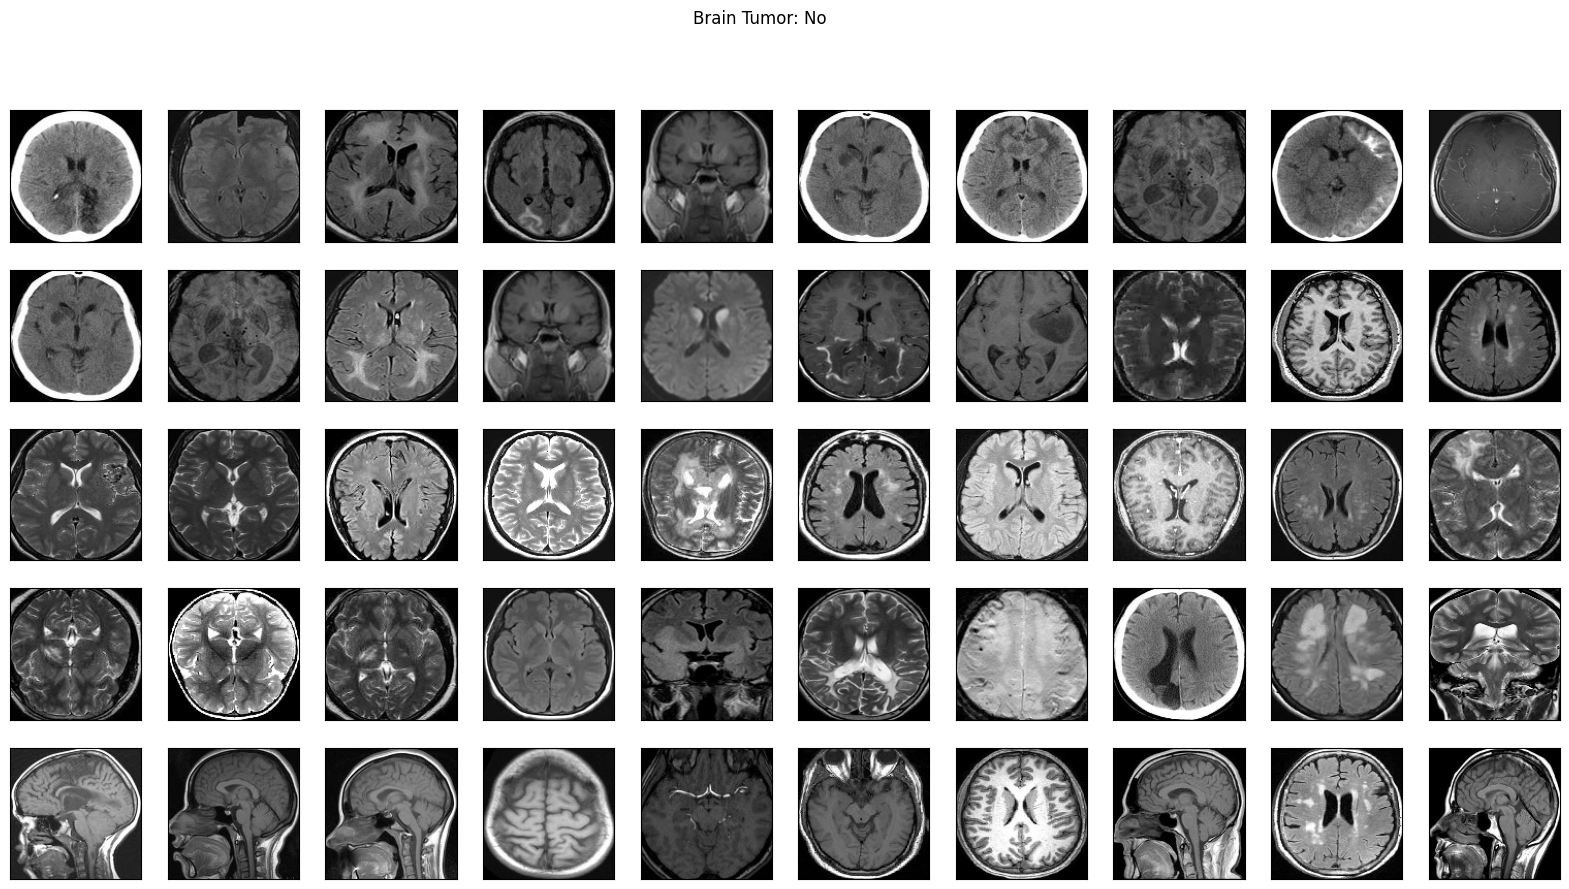

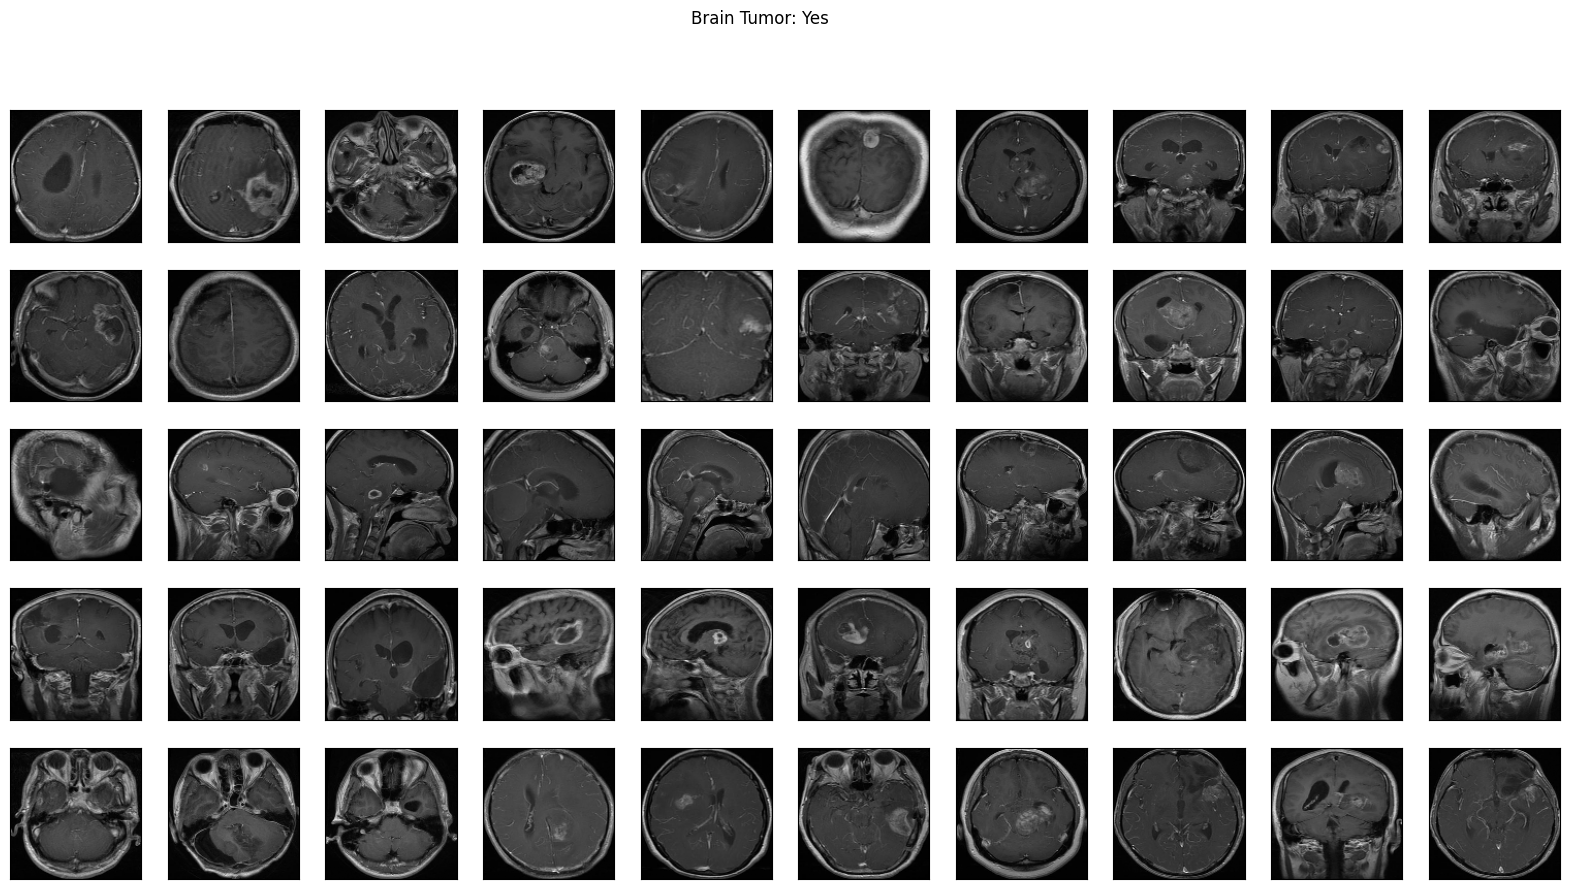

In [64]:
plot_sample_images(x_input_np, y_output_np, n=50)